<a href="https://colab.research.google.com/github/na0260/machine-learning-lab/blob/main/LabReport02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data[:, :4]
y = iris.target

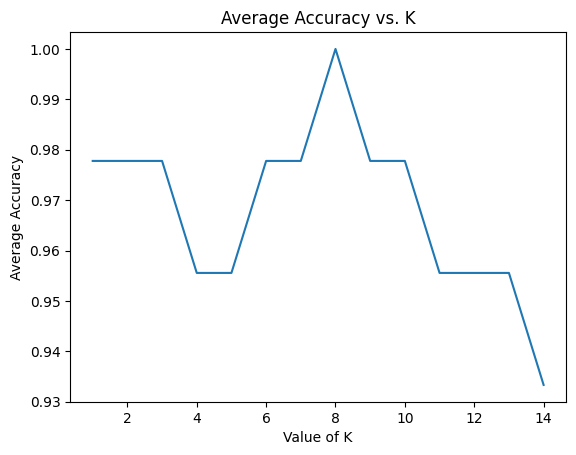

Average performance for each K:
K = 1: Average Accuracy = 0.9777777777777776
K = 2: Average Accuracy = 0.9777777777777776
K = 3: Average Accuracy = 0.9777777777777776
K = 4: Average Accuracy = 0.9555555555555555
K = 5: Average Accuracy = 0.9555555555555555
K = 6: Average Accuracy = 0.9777777777777776
K = 7: Average Accuracy = 0.9777777777777776
K = 8: Average Accuracy = 1.0
K = 9: Average Accuracy = 0.9777777777777776
K = 10: Average Accuracy = 0.9777777777777776
K = 11: Average Accuracy = 0.9555555555555555
K = 12: Average Accuracy = 0.9555555555555555
K = 13: Average Accuracy = 0.9555555555555555
K = 14: Average Accuracy = 0.9333333333333333
Best K based on average performance: 8


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

range_k = range(1, 15)
average_scores = []

for k in range_k:
    scores = []

    for _ in range(10):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))

    average_score = sum(scores) / len(scores)
    average_scores.append(average_score)

best_k = range_k[average_scores.index(max(average_scores))]

plt.plot(range_k, average_scores)
plt.xlabel("Value of K")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs. K")
plt.show()

print("Average performance for each K:")
for k, avg_score in zip(range_k, average_scores):
    print(f"K = {k}: Average Accuracy = {avg_score}")

print("Best K based on average performance:", best_k)


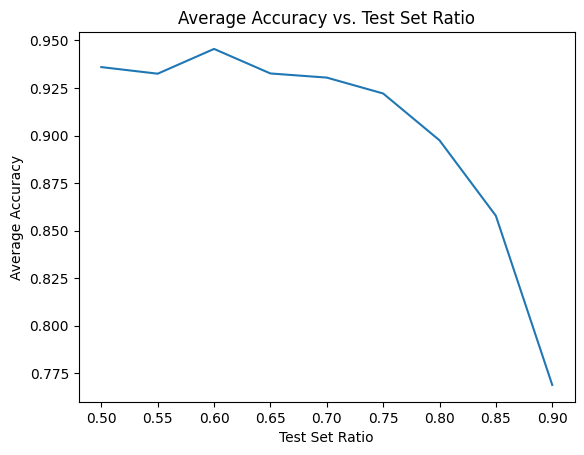

Average accuracy for each test set ratio:
Test Set Ratio = 0.5: Average Accuracy = 0.9359999999999999
Test Set Ratio = 0.55: Average Accuracy = 0.9325301204819276
Test Set Ratio = 0.6: Average Accuracy = 0.9455555555555556
Test Set Ratio = 0.65: Average Accuracy = 0.9326530612244899
Test Set Ratio = 0.7: Average Accuracy = 0.9304761904761906
Test Set Ratio = 0.75: Average Accuracy = 0.9221238938053098
Test Set Ratio = 0.8: Average Accuracy = 0.8975
Test Set Ratio = 0.85: Average Accuracy = 0.8578125
Test Set Ratio = 0.9: Average Accuracy = 0.768888888888889
Best test set ratio based on average accuracy: 0.6


In [8]:
test_ratios = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90]
average_accuracies = []

for ratio in test_ratios:
    scores = []

    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio)
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))

    average_accuracy = sum(scores) / len(scores)
    average_accuracies.append(average_accuracy)

best_ratio = test_ratios[average_accuracies.index(max(average_accuracies))]

plt.plot(test_ratios, average_accuracies)
plt.xlabel("Test Set Ratio")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs. Test Set Ratio")
plt.show()

print("Average accuracy for each test set ratio:")
for ratio, avg_accuracy in zip(test_ratios, average_accuracies):
    print(f"Test Set Ratio = {ratio}: Average Accuracy = {avg_accuracy}")

print("Best test set ratio based on average accuracy:", best_ratio)
